In [1]:
# import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# evaluation metric
# rms = mean_squared_error(y_actual, y_predicted, squared=False)

In [3]:
# data
df = pd.read_csv(r"C:\Users\Lakshmi\Downloads\kagglex-cohort4 (1)\train.csv")

In [4]:
# data checks to perform

In [5]:
# check missing
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [6]:
# duplicates
df.duplicated().sum()

0

In [7]:
# datatypes
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [8]:
# unique values in column
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [9]:
len(df)

54273

In [10]:
df.shape

(54273, 13)

In [11]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [12]:
# insights from the data
# describe

In [13]:
df.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [14]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [15]:
df['clean_title'].unique()

array(['Yes'], dtype=object)

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df.drop('model',axis=1,inplace=True)

In [18]:
df.head()

,id,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [19]:
df.info

<bound method DataFrame.info of           id    brand  model_year  milage      fuel_type  \
0          0     Ford        2018   74349       Gasoline   
1          1      BMW        2007   80000       Gasoline   
2          2   Jaguar        2009   91491       Gasoline   
3          3      BMW        2022    2437         Hybrid   
4          4  Pontiac        2001  111000       Gasoline   
...      ...      ...         ...     ...            ...   
54268  54268      BMW        2017   29000       Gasoline   
54269  54269     Audi        2015   94634  E85 Flex Fuel   
54270  54270  Porsche        2013   40989       Gasoline   
54271  54271  Porsche        2023    1518       Gasoline   
54272  54272     Audi        2021   35000         Hybrid   

                                                  engine  \
0          375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1      300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3      

In [20]:
most_freq_val = df['fuel_type'].value_counts().idxmax()
most_freq_val

'Gasoline'

In [21]:
df['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [22]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [23]:
df['fuel_type'].replace('–', 'Electric', inplace = True)

In [24]:
df['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [25]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [26]:
df.drop(columns=['clean_title'],inplace = True)

In [27]:
df.dropna(subset = ['accident'], axis = 0, inplace = True)

In [28]:
df.shape

(54273, 11)

In [29]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [30]:
df.head()

,id,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement
0,0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000,375.0,3.5L
1,1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250,300.0,3.0L
2,2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000,300.0,4.2L
3,3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,335.0,3.0L
4,4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,7850,200.0,3.8L


In [31]:
df['Horsepower'].isnull().sum()

3684

In [32]:
df['Horsepower'].dtypes

dtype('O')

In [33]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors = 'coerce')
df['Horsepower'].dtype

dtype('float64')

In [34]:
df['Horsepower'].fillna(df['Horsepower'].mean(),inplace=True)
df['Horsepower'].isnull().sum()

0

In [35]:
df['Engine_Displacement'].isnull().sum()

0

In [36]:
df['Engine_Displacement']=df['Engine_Displacement'].str.replace('L','')

In [37]:
df['Engine_Displacement']=pd.to_numeric(df['Engine_Displacement'],errors='coerce')

In [38]:
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)
df['Engine_Displacement'].isnull().sum()

0

In [39]:
df.head()

,id,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement
0,0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000,375.0,3.5
1,1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250,300.0,3.0
2,2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000,300.0,4.2
3,3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,335.0,3.0
4,4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,7850,200.0,3.8


In [40]:
df.drop('engine', axis = 1, inplace = True)

In [41]:
df['age'] = 2024 - df['model_year']

In [42]:
df.drop('model_year', axis = 1, inplace = True)

In [43]:
df.head(4)

,id,brand,milage,fuel_type,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement,age
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,11000,375.0,3.5,6
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,None reported,8250,300.0,3.0,17
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,15000,300.0,4.2,15
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,335.0,3.0,2


In [44]:
# eda

In [45]:
df.head()

,id,brand,milage,fuel_type,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement,age
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,11000,375.0,3.5,6
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,None reported,8250,300.0,3.0,17
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,15000,300.0,4.2,15
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,335.0,3.0,2
4,4,Pontiac,111000,Gasoline,A/T,White,Black,None reported,7850,200.0,3.8,23


In [46]:
# EDA

In [47]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29500.0


In [48]:
#use IQR value to filter out the outliers
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 0.7 * IQR)))]
df.shape

(47678, 12)

In [49]:
import pandas as pd

# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()
Q3 = df['price'].quantile(0.75)

# Define a function to categorize data points into quartiles
def categorize_quartile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"

# Apply the categorize_quartile function to the 'price' column
df['Quartile'] = df['price'].apply(categorize_quartile)
# Count the number of data points in each quartile
quartile_counts = df['Quartile'].value_counts().reset_index()
quartile_counts.columns = ['Quartile', 'Count']

# Display the quartile distribution table
print(quartile_counts)

    Quartile  Count
0   Q3 (75%)  12028
1   Q2 (50%)  11978
2  Q4 (100%)  11920
3   Q1 (25%)  11752


C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\16075843.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quartile'] = df['price'].apply(categorize_quartile)


In [51]:
df.drop(['accident', 'Quartile'], axis = 1, inplace = True)


C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\643887207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['accident', 'Quartile'], axis = 1, inplace = True)


In [52]:
df.head(4)

,id,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,375.0,3.5,6
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,300.0,3.0,17
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,300.0,4.2,15
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,335.0,3.0,2


In [53]:
#create a group of transmission, fuel_type and price
df_group = df.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
#create a pivot table
df_pivot = df_group.pivot(index = 'transmission', columns = 'fuel_type', values = 'price')
df_pivot

fuel_type,Diesel,E85 Flex Fuel,Electric,Gasoline,Hybrid,Plug-In Hybrid
transmission,,,,,,
1-Speed A/T,33200.000000,NaN,NaN,37159.475000,50700.000000,NaN
1-Speed Automatic,NaN,NaN,NaN,35625.000000,NaN,NaN
10-Speed A/T,47531.641304,37481.684211,NaN,42893.625171,47474.166667,NaN
10-Speed Automatic,41609.800000,NaN,NaN,41205.101167,NaN,NaN
10-Speed Automatic with Overdrive,NaN,NaN,NaN,47604.500000,NaN,NaN
2-Speed A/T,NaN,NaN,NaN,NaN,51000.000000,NaN
4-Speed A/T,8366.666667,11084.193548,14612.600000,11701.653451,8633.333333,NaN
4-Speed Automatic,NaN,39985.000000,NaN,20104.000000,NaN,NaN
5-Speed A/T,23258.520833,10785.714286,12945.666667,15787.475158,18499.666667,NaN


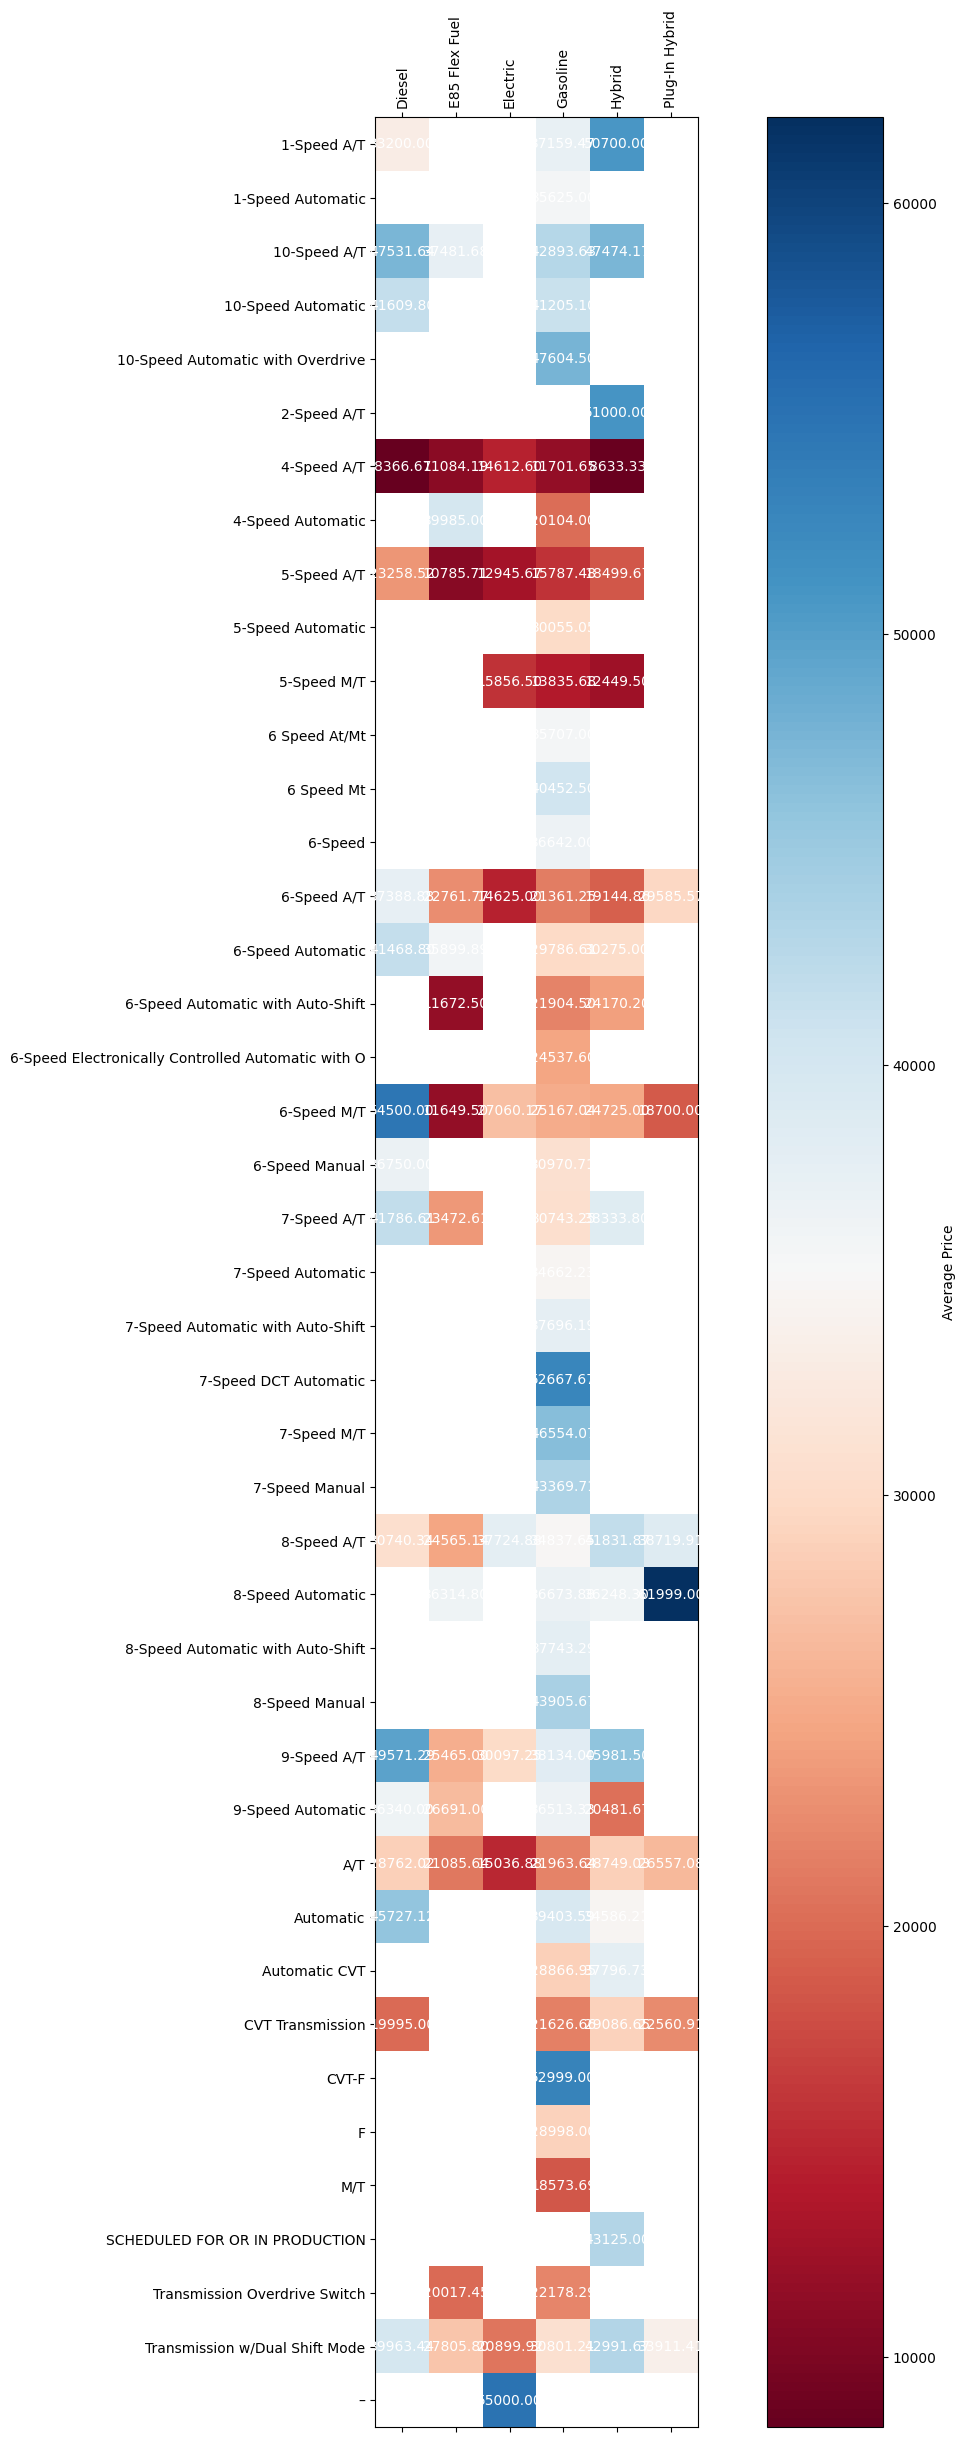

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap
fig, ax = plt.subplots(figsize=(18, 30), dpi=100)
cax = ax.matshow(df_pivot, cmap='RdBu')

# Label names
row_labels = df_pivot.columns
col_labels = df_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]))
ax.set_yticks(np.arange(df_pivot.shape[0]))

# Insert labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

# Rotate label if too long
plt.xticks(rotation=90)
# Add price numbers on each box
for i in range(len(col_labels)):
    for j in range(len(row_labels)):
        text = ax.text(j, i, f'{df_pivot.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.colorbar(cax, label='Average Price')
plt.show()

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

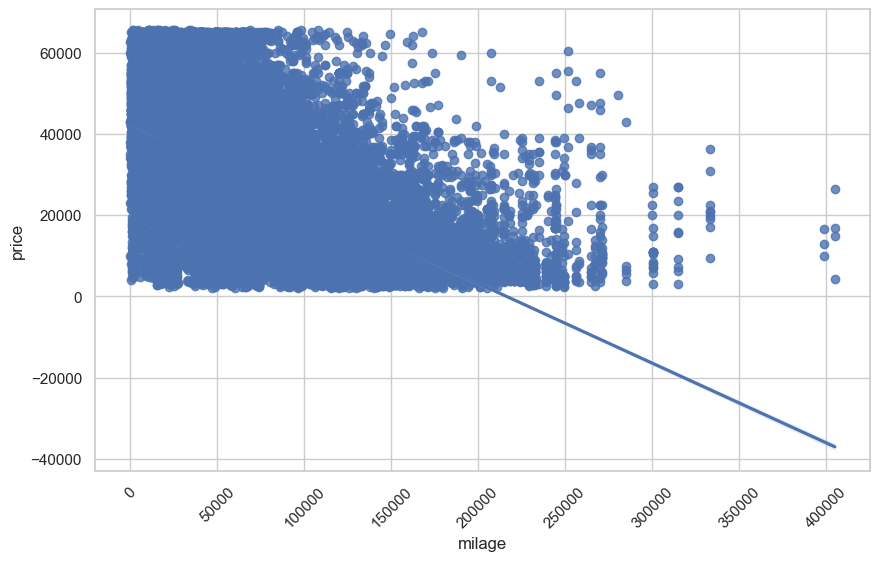

In [55]:
#draw and regression plot of milage vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'milage', y = 'price', data =df)
plt.xticks(rotation=45)

In [56]:
from scipy import stats
#to find pearson coefficent - Horsepower and Price
pearson_coef, p_value = stats.pearsonr(df['Horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5008004847891931  with a P-value of P = 0.0


In [57]:
#to find pearson coefficent - age and price
pearson_coef, p_value = stats.pearsonr(df['age'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6382135985292476  with a P-value of P = 0.0


In [58]:
#to find pearson coefficent - milage and price
pearson_coef, p_value = stats.pearsonr(df['milage'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6291778927675257  with a P-value of P = 0.0


In [59]:
#to find pearson coefficent - engine displacement
pearson_coef, p_value = stats.pearsonr(df['Engine_Displacement'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.18073673111842053  with a P-value of P = 0.0


In [60]:
grp_test = df[['fuel_type','transmission','price']]
new_group_1 = grp_test[['transmission','price']].groupby(['transmission'])
new_group_1.head(5)

,transmission,price
0,10-Speed A/T,11000
1,6-Speed M/T,8250
2,6-Speed A/T,15000
3,Transmission w/Dual Shift Mode,63500
4,A/T,7850
...,...,...
48102,SCHEDULED FOR OR IN PRODUCTION,56750
49125,1-Speed Automatic,44495
50337,6-Speed,39951
51956,1-Speed Automatic,36791


In [61]:
f_val, p_val = stats.f_oneway(
    new_group_1.get_group('6-Speed A/T')['price'],
    new_group_1.get_group('8-Speed Automatic')['price'],
    new_group_1.get_group('7-Speed A/T')['price'],
    new_group_1.get_group('8-Speed A/T')['price'],
    new_group_1.get_group('9-Speed Automatic')['price'],
    new_group_1.get_group('10-Speed A/T')['price'],
    new_group_1.get_group('9-Speed A/T')['price'],
    new_group_1.get_group('Automatic CVT')['price'],
    new_group_1.get_group('7-Speed Automatic with Auto-Shift')['price'],
    new_group_1.get_group('10-Speed Automatic')['price'],
    new_group_1.get_group('6-Speed Automatic')['price'],
    new_group_1.get_group('8-Speed Automatic with Auto-Shift')['price'],
    new_group_1.get_group('7-Speed Automatic')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)


ANOVA results: F= 442.2580697488286 , P = 0.0


In [62]:
new_group_2 = grp_test[['fuel_type','price']].groupby(['fuel_type'])
new_group_2.head(5)

,fuel_type,price
0,Gasoline,11000
1,Gasoline,8250
2,Gasoline,15000
3,Hybrid,63500
4,Gasoline,7850
5,Gasoline,4995
18,E85 Flex Fuel,31900
29,Diesel,51900
31,Hybrid,50000
39,Hybrid,53000


In [63]:
#testing for multiple fuel types
f_val, p_val = stats.f_oneway(new_group_2.get_group('E85 Flex Fuel')['price'], new_group_2.get_group('Gasoline')['price'], new_group_2.get_group('Hybrid')['price'], new_group_2.get_group('Diesel')['price'], new_group_2.get_group('Plug-In Hybrid')['price'], new_group_2.get_group('Electric')['price']) 
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 176.3405650980536 , P = 1.3244782595555825e-186


In [65]:
!pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 218.3 kB/s eta 0:00:00


In [66]:
#Apply target encoding to fuel_type column in relation to price 
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['fuel_type'])
df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])
df.head()

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\104869771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])


,id,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,375.0,3.5,6,26727.332745
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,300.0,3.0,17,26727.332745
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,300.0,4.2,15,26727.332745
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,335.0,3.0,2,34880.205593
4,4,Pontiac,111000,Gasoline,A/T,White,Black,7850,200.0,3.8,23,26727.332745


In [67]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['transmission'])
df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])
df.head()

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\3323456986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])


,id,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,375.0,3.5,6,26727.332745,43181.389894
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,300.0,3.0,17,26727.332745,25182.333038
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,300.0,4.2,15,26727.332745,22442.515973
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,335.0,3.0,2,34880.205593,31183.413245
4,4,Pontiac,111000,Gasoline,A/T,White,Black,7850,200.0,3.8,23,26727.332745,22179.077309


In [68]:
#Apply target encoding to brand column in relation to price
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['brand'])
df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])
df.head()

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\103328239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])


,id,brand,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target
0,0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,375.0,3.5,6,26727.332745,43181.389894,29635.891644
1,1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,300.0,3.0,17,26727.332745,25182.333038,29528.898910
2,2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,300.0,4.2,15,26727.332745,22442.515973,25565.730508
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,335.0,3.0,2,34880.205593,31183.413245,29528.898910
4,4,Pontiac,111000,Gasoline,A/T,White,Black,7850,200.0,3.8,23,26727.332745,22179.077309,15315.025511


In [69]:
#drop ext_col and int_col
df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)
df.head()

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_25100\3998026198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)


,id,brand,milage,fuel_type,transmission,price,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target
0,0,Ford,74349,Gasoline,10-Speed A/T,11000,375.0,3.5,6,26727.332745,43181.389894,29635.891644
1,1,BMW,80000,Gasoline,6-Speed M/T,8250,300.0,3.0,17,26727.332745,25182.333038,29528.898910
2,2,Jaguar,91491,Gasoline,6-Speed A/T,15000,300.0,4.2,15,26727.332745,22442.515973,25565.730508
3,3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,63500,335.0,3.0,2,34880.205593,31183.413245,29528.898910
4,4,Pontiac,111000,Gasoline,A/T,7850,200.0,3.8,23,26727.332745,22179.077309,15315.025511


In [70]:
df['fuel_type_target'].corr(df['price'])

0.13475656692947255

In [71]:
df['transmission_target'].corr(df['price'])


0.45367513700821294

In [72]:
df['brand_target'].corr(df['price'])

0.30879431170036725

In [73]:
# prediction

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['brand_target']]
y = df[['price']]
lm.fit(x,y)

LinearRegression()

In [75]:
#make predictions
yhat = lm.predict(x)
yhat[0:5]

array([[29656.80259881],
       [29549.20330206],
       [25563.56693625],
       [29549.20330206],
       [15254.7487203 ]])

In [76]:
lm.intercept_

array([-147.1006172])

In [77]:
lm.coef_

array([[1.00566919]])

In [78]:
#find the RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
rmse = np.sqrt(mse)
rmse

14651.161313044828

In [79]:
# multi

In [80]:
#define Z as the input
Z = df[['brand_target', 'fuel_type_target', 'transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement']]
Z.head()

,brand_target,fuel_type_target,transmission_target,age,milage,Horsepower,Engine_Displacement
0,29635.891644,26727.332745,43181.389894,6,74349,375.0,3.5
1,29528.898910,26727.332745,25182.333038,17,80000,300.0,3.0
2,25565.730508,26727.332745,22442.515973,15,91491,300.0,4.2
3,29528.898910,34880.205593,31183.413245,2,2437,335.0,3.0
4,15315.025511,26727.332745,22179.077309,23,111000,200.0,3.8


In [81]:
lm.fit(Z, y)

LinearRegression()

In [82]:
#make predictions
yhat2 = lm.predict(Z)
yhat2[0:5]

array([[35109.59541679],
       [18644.79728467],
       [19546.25988824],
       [45093.14489813],
       [ 5201.8968671 ]])

In [83]:
lm.intercept_


array([14322.96513756])

In [84]:
lm.coef_


array([[ 1.20297529e-01,  3.14331343e-01,  1.50478736e-01,
        -9.33288960e+02, -1.01053836e-01,  3.27210302e+01,
         9.04281575e+02]])

In [85]:
#find the RMSE
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(df['price'], yhat2)
rmse1 = np.sqrt(mse1)
rmse1

9975.865587902967

In [86]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 0)

In [87]:
lm.fit(x_train, y_train)

LinearRegression()

In [88]:
#make predictions
yhat3 = lm.predict(x_test)
yhat3[0:5]

array([[34412.44158674],
       [33540.66013946],
       [36125.86074169],
       [33541.18286002],
       [38222.64725266]])

In [89]:
#find the RMSE
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(df['price'], yhat2)
rmse2 = np.sqrt(mse2)
rmse2

9975.865587902967

In [90]:
# perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [92]:
pr = PolynomialFeatures(degree=3)
pr

PolynomialFeatures(degree=3)

In [93]:
#fit transform Z
Z_pr = pr.fit_transform(Z)
Z_pr.shape

(47678, 120)

In [94]:
poly = LinearRegression()
poly

LinearRegression()

In [95]:
poly.fit(Z_pr, y)

LinearRegression()

In [96]:
#import standard scaler and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#create a list of tuples - each containing a model/estimator and its constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [97]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
pipe.fit(Z_pr,y)

In [ ]:
ypipe=pipe.predict(Z_pr)
ypipe[0:4]

In [ ]:
#find the RMSE
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(df['price'], ypipe)
rmse3 = np.sqrt(mse3)
rmse2